# **ДЗ №2. Гершбаум С.**

## **Задача 1.**

Гипотеза о том, что среднее напряжение действительно равняется 12 В - простая. Значит, ее мы записываем как нулевую, а в пару к ней подберем альтернативную.

**Нулевая гипотеза:** среднее напряжение, выдаваемое батарейками, равняется 12 В $(\mu_0 = 12)$.   
$$H_0: \mu = 12$$

**Альтернативная гипотеза:** среднее напряжение батареек не равняется 12 В.   $$H_A: \mu \neq 12$$

Наша выборка:
$$ X = \{12.9, 11.6, 13.5, 13.9, 12.1, 11.9, 13.0\} $$

Примем уровень значимости:
$$ \alpha = 0.05 $$

Для проверки гипотезы о среднем будем использовать *одновыборочный критерий Стьюдента (t-критерий)*. Для данного критерия статистика выглядит следующим образом:   
$$ T = \frac{(\overline{X} - \mu_0) \sqrt{n-1}}{S}, $$ 
$ \displaystyle \overline{X} = \frac{1}{n} \sum_{i = 1}^{n} X_i \quad $ - выборочное среднее,

$ \displaystyle S^2 = \frac{1}{n} \sum_{i = 1}^{n} (X_i - \overline{X})^2 \quad $ - выборочная дисперсия.


Условие использования критерия Стьюдента - **выборочое среднее $\overline{X}$ должно иметь нормальное распределение.** $\overline{X}$ нормально распределено тогда, наблюдения сами $X_i$ нормально распределены. Хоть в нашей задаче наблюдений всего 7, будет "хорошим тоном" проверить их на нормальность при помощи теста Шапиро-Уилка:

In [3]:
import numpy as np
from scipy import stats
from scipy.stats import shapiro
import matplotlib.pyplot as plt

In [7]:
voltages = np.array([12.9, 11.6, 13.5, 13.9, 12.1, 11.9, 13.0])
shapiro(voltages)

ShapiroResult(statistic=np.float64(0.9461528332649155), pvalue=np.float64(0.694601251101445))

p-value получилось значительно выше уровня значимости $\alpha = 0.05$, поэтому мы не можем отвергнуть гипотезу о нормальности распределения наблюдений, следовательно, можем спокойно использовать критерий Стьюдента для проверки гипотезы о среднем.

Для проверки гипотезы воспользуемся встроенной функцией вычисления статистики и p-value для одновыборочного критерия Стьюдента:

In [10]:
mu0 = 12
stats.ttest_1samp(voltages, mu0)

TtestResult(statistic=np.float64(2.1578017974978794), pvalue=np.float64(0.07430190210562303), df=np.int64(6))

$ p \approx 0.074, \,\,\, \alpha < p $. Следовательно, мы не можем отвергнуть нулевую гипотезу $ H_0 $ и поэтому она принимается на уровне значимости $\alpha = 0.05$.

**Заключение**: в данной задаче был поставлен вопрос "можно ли считать, что среднее напряжение равно 12 В?". Эта гипотеза простая, следовательно, она записывается как нулевая. Альтернативная гипотеза была сформулирована как "среднее напряжение **не** равно 12 В", поэтому в таком случае за p-value мы принимаем полученное значение, которое по умолчанию вычисляется для двусторонней критической области $ (p \approx 0.074) $. На основе полученного p-value мы сделали вывод, что не можем отвергнуть нулевую гипотезу на уровне значимости $\alpha = 0.05$. Однако, если бы мы сформулировали альтернативную гипотезу иначе, например, "среднее напряжение **больше** 12 В" или "среднее напряжение **меньше** 12 В", то в таком случае p-value необходимо было бы поделить на 2, поскольку мы бы имели дело с односторонней критической областью. При таком раскладе мы бы отвергли нулевую гипотезу в пользу альтернативной на уровне значимости $\alpha = 0.05$, поскольку получили бы $ p \approx 0.037 $, что меньше $ 0.05 $.

## **Задача 2.**

Данная задача - одновыборочная, а наблюдения - парные, поскольку в обоих методах используются одни и те же образцы. В данном случае будем проверять гипотезу о равенстве средних для парных наблюдений. Сформулируем гипотезы:

**Нулевая гипотеза:** показания двух методов в среднем не отличаются (разница показаний $ \mu_0 $ равна 0).   
$$H_0: \mu_0 = 0$$

**Альтернативная гипотеза:** один из методов может давать более высокие показания, чем другой.   
$$H_A: \mu_0 \neq 0$$

Парные наблюдения:
$$ X = \{23.1, 23.2, 26.5, 26.6, 27.1, 48.3, 40.5, 25.0, 38.4, 23.5\} $$
$$ Y = \{22.7, 23.6, 27.1, 27.4, 27.4, 46.8, 40.4, 24.9, 38.1, 23.8\} $$
Разность наблюдений:
$$ D = X - Y = \{0.4, −0.4, −0.6, −0.8, −0.3, 1.5, 0.1, 0.1, 0.3, −0.3\} $$

Уровень значимости: $$ \alpha = 0.05 $$

Аналогично предыдущей задаче будем использовать *критерий Стьюдента*, только уже *для парных выборок*:
$$ T = \frac{\overline{D} \sqrt{n-1}}{S_D}, $$ 
$ \displaystyle T $ - статистика критерия,

$ \displaystyle \overline{D}$ - выборочное среднее разности, $ \quad \displaystyle \overline{D} = \frac{1}{n} \sum_{i = 1}^{n} D_i $, 

$ \displaystyle S_D$ - выборочное стандартное отклонение разности, $ \quad \displaystyle S_D^2 = \frac{1}{n} \sum_{i = 1}^{n} (D_i - \overline{D})^2 $ - выборочная дисперсия.

Проверим выборку на нормальность:

In [4]:
diffs = np.array([0.4, -0.4, -0.6, -0.8, -0.3, 1.5, 0.1, 0.1, 0.3, -0.3])
shapiro(diffs)

ShapiroResult(statistic=np.float64(0.8998483579792755), pvalue=np.float64(0.21825780478589757))

$ p \approx 0.218$, что больше $ 0.05$. Оснований для отклонения гипотезы о нормальности распределения данных нет, но p-value получилось относительно небольшим. Интересно проверить нормальность визуально, например, с помощью графика квантиль-квантиль (Q-Q Plots). Он поможет оценить, является ли имеющийся набор данных  приблизительно нормально распределённым:

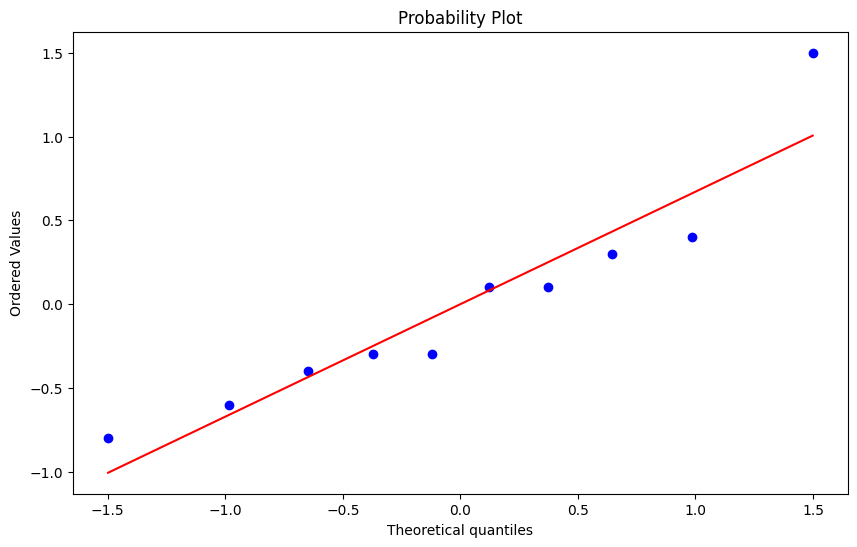

In [12]:
plt.figure(figsize=(10, 6))
stats.probplot(diffs, dist="norm", plot=plt)  # сравниваем с нормальным распределением
plt.show()

Есть небольшие отклонения, нормальность не идеальна, но в целом точки лежат близко к теоретической прямой. Оснований для отвержения гипотезы о нормальности данных нет, поэтому можем использовать критерий Стьюдента.

In [21]:
stats.ttest_1samp(diffs, 0)

TtestResult(statistic=np.float64(0.0), pvalue=np.float64(1.0), df=np.int64(9))

In [17]:
m1 = np.array([23.1, 23.2, 26.5, 26.6, 27.1, 48.3, 40.5, 25.0, 38.4, 23.5])
m2 = np.array([22.7, 23.6, 27.1, 27.4, 27.4, 46.8, 40.4, 24.9, 38.1, 23.8])
stats.ttest_rel(m1, m2)

TtestResult(statistic=np.float64(1.7154884978678027e-15), pvalue=np.float64(0.9999999999999987), df=np.int64(9))

T-статистика практически равна $0$, а p-value практически $1$ $ (\gg 0.05) $. Это говорит о том, что мы не можем отвергнуть нулевую гипотезу $ H_0 $ и поэтому она принимается на уровне значимости $\alpha = 0.05$. Средняя разница между показаниями методов статистически не значима.

## **Задача 3.**

В данном случае выборки - независимые. Следовательно, будем проверять гипотезу о равенстве средних для независимых выборок. эта гипотеза проверяется с помощью *критерия Стьюдента для независимых выборок*. Сформулируем предположения:

**1.** Наблюдения - независимые (независимы как наблюдения внутри каждой из выборок, так и выборки между собой).

**2.** Математические ожидания:
$$ E(X_i) = \mu_X; \,\,\,  E(Y_i) = \mu_Y. $$
Наблюдения считаются не только независимыми, но и одинаково распределенными. Соответственно, мат. ожидания для всех $ X_i $ и отдельно для $ Y_i $ будут одинаковыми.

**3.** Выборочые средние $\overline{X}$ и $\overline{Y}$ распределены нормально. Это требование выполняется когда:
   - либо сами наблюдения $ X_i, Y_i $ распределены нормально;
   - либо работает ЦПТ (если наблюдений много).

Гипотезы:

**Нулевая гипотеза:** среднее артериальное давление у горожан и жителей сельской местности одинаково.
$$H_0: \mu_X = \mu_Y$$

**Альтернативная гипотеза:** горожане имеют в среднем более высокое артериальное давление, чем селяне.
$$H_A: \mu_X > \mu_Y$$

Имеющиеся выборки ($X_i$ - показатели горожан, $Y_i$ - показатели селян):
$$ X = \{132, 111, 119, 138, 200, 131, 138, 170, 159, 140\} $$
$$ Y = \{115, 190, 127, 155, 148, 121, 116, 121, 197\} $$

$ \alpha = 0.05 $ - уровень значимости.

Статистика критерия выглядит следующим образом:
$$ T = \frac{\overline{X} - \overline{Y}}{\displaystyle \sqrt{\frac{S_X^2}{m} + \frac{S_Y^2}{n}}}, $$ 

$ \overline{X},\, \overline{Y} $ - выборочные средние: 
$$ \overline{X} = \frac{1}{m} \sum_{i = 1}^{m} X_i, \,\,\,\,\, \overline{Y} = \frac{1}{n} \sum_{i = 1}^{n} Y_i \,; $$

$ S_X^2,\, S_Y^2 $ - выборочные дисперсии:
$$ S_X^2 = \frac{1}{m} \sum_{i = 1}^{m} (X_i - \overline{X})^2, \,\,\,\,\, S_Y^2 = \frac{1}{n} \sum_{i = 1}^{n} (Y_i - \overline{Y})^2 \,; $$

$ m,\, n $ - количество наблюдений.

В случае верности нулевой гипотезы $ H_0 $ статистика $ T $ имеет распределение Стьюдента с $ k $ степенями свободы:
$$ T \bigg|_{H_0} \sim t(k),$$

где $ \,\, k = \frac{\left (\displaystyle \frac{S_X^2}{m} + \frac{S_Y^2}{n} \right)^2}{\displaystyle \frac{\left (\displaystyle \frac{S_X^2}{m} \right)^2}{m-1} + \frac{\left (\displaystyle \frac{S_Y^2}{n} \right)^2}{n-1}} $

Проверка на нормальность:

In [23]:
city = np.array([132, 111, 119, 138, 200, 131, 138, 170, 159, 140])
shapiro(city).pvalue

np.float64(0.281440686937816)

In [24]:
village = np.array([115, 190, 127, 155, 148, 121, 116, 121, 197])
shapiro(village).pvalue

np.float64(0.04313951145476073)

p-value при проверке на нормальность наблюдений у селян составил $\approx 0.431$, что меньше $0.05$. Сравним визуально с нормальным распределением:

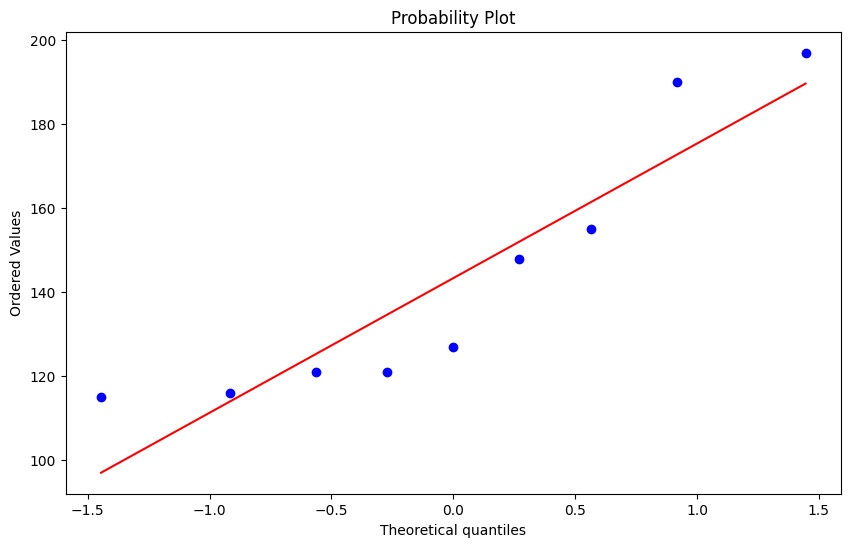

In [42]:
plt.figure(figsize=(10, 6))
stats.probplot(village, dist="norm", plot=plt) 
plt.show()

Отклонения есть, и, например, в сравнении с графиком, который был построен ранее (в предыдущей задаче), они кажутся более серьезными. 
Но! p-value на самом деле очень близок к $0.05$, и, как мы видим, точки расположены по направленнии теоретической прямой. Гипотеза о нормальности распределения наблюдений у селян отвергается на уровне значимости $\alpha = 0.05$ вовсе неуверенно. Скорее всего, это связано с тем, что наблюдений очень мало (меньше 10). В данной ситуации стоило бы взять больше наблюдений, но такой возможности в нашем случае нет. В качестве альтернативы можно использовать *критерий Манна-Уитни*, который не требует нормальности. В таком случае объединенная выборка из $X_i$ и $Y_i$ ранжируется:
$$W = \sum_{i = 1}^{m} rank(X_i)$$
Статисика критерия:
$$\tilde{W} = \frac{W - E(W)}{\sqrt{var(W)}},$$

$\displaystyle E(W) = \frac{m}{2}(m + n + 1)$ - мат. ожидание;

$\displaystyle var(W) = \frac{mn}{12}(m + n + 1)$ - дисперсия.

В таком случае гипотезы при использовании критерия Манна-Уитни будут выглядеть следующим образом:

**Нулевая гипотеза:** законы распределения наблюдений $X_i$ и $Y_i$ не отличаются друг от друга (сдвиг $\theta$ отсутствует).
$$H_0: \theta = 0$$

**Альтернативная гипотеза:** распределение $X_i$ сдвинуто вправо относительно распределения $Y_i$.
$$H_A: \theta > 0$$

In [46]:
stats.mannwhitneyu(city, village, alternative='greater') # одностор. крит. область

MannwhitneyuResult(statistic=np.float64(50.0), pvalue=np.float64(0.3565312487796153))

$p \approx 0.357$, что выше уровня значимости $\alpha = 0.05$. Следовательно, на уровне значимости $0.05$ мы не можем отвергнуть нулевую гипотезу о том, что распределения наблюдений для горожан и селян не сдвинуты друг относительно друга (разница в распределении (медианах) артериального давления у горожан и селян статистически не значима).

---
Если же все-таки считать обе группы наблюдений нормально распределенными (поскольку p-значение очень близко к $0.05$, но больше наблюдений мы взять не можем), взглянем на результаты t-теста:

In [38]:
# 1. Закодим вручную
m = len(city)
n = len(village)
s2x = city.var()
s2y = village.var()
T = (city.mean() - village.mean()) / (s2x/m + s2y/n)**0.5   # статистика
df = round((s2x/m + s2y/n)**2/((s2x/m)**2/(m-1) + (s2y/n)**2/(n-1)))   # число степеней свободы, округляем до целого
st = stats.t(df)
p = 1 - st.cdf(T)   # правая крит. область
print(T, p)

0.03681832098940068 0.48554266145506586


In [26]:
# 2. Готовое решение
stats.ttest_ind(city, village).pvalue/2

np.float64(0.486178812200461)

Полученные значения чуть отличаются (на шесть тысячных) из-за того, что встроенный метод считает дисперсии по умолчанию одинаковыми, в то время как мы считаем их разными (при подсчете вручную). Но в обоих случаях $p > 0.05$, поэтому мы не можем отвергнуть нулевую гипотезу о том, что среднее артериальное давление у горожан и жителей сельской местности одинаково. Ответ на вопрос в условии задачи (можно ли считать верной выдвинутую гипотезу о том, что горожане имеют в среднем более высокое систолическое артериальнное давление, чем селяне) - выдвинутую гипотезу нельзя считать верной.

## **Задача 4.**

В данной задаче мы можем проверить гипотезу о равенстве долей мужчин/женщин. У нас есть данные о пропорциях и исходной вероятности (вероятности успеха), но нет конкретных данных о смертности, поэтому делать вывод о ней в свете имеющихся у нас данных не совсем корректно (причины изменения пропорций неизвестны). Проверим гипотезу о равенстве доли мужчин в случайной выборке с ожидаемым значением. В данном контексте достаточно проверить только одну из долей, поскольку доли мужчин и женщин - взаимозависимые величины, и проверка одной из них автоматически дает информацию о другой.

Изложим гипотезы.

**Нулевая гипотеза:** доля мужчин в случайной выборке $(p = 0.50)$ совпадает с долей при рождении $(p_0 = 0.52)$ (тогда доля женщин равна $0.48$).
$$H_0: p = p_0$$

**Альтернативная гипотеза:** доля мужчин в выборке не совпадает с их долей при рождении (аналогично для доли женщин).
$$H_A: p \neq p_0$$


Уровень значимости выбираем $\alpha = 0.05$.

Какие данные у нас есть?
   - число наблюдений: $n = 5000 \,$;
   - число "успехов" (количество мужчин в выборке): $m = 2500 \,$;
   - вероятность "успеха": $p_0 = 0.52 \,$.

Будем использовать *биномиальный критерий*, статистика которого выглядит следующим образом:
$$ T = \frac{m - np_0}{\sqrt{np_0(1-p_0)}} $$

В нашем случае количество наблюдений - достаточно большое, поэтому в случае верности нулевой гипотезы статистика $T$ имеет стандартное нормальное распределение:
$$ T \bigg|_{H_0} \sim N(0; 1)$$

In [21]:
m = 2500
n = 5000
p0 = 0.52
stats.binomtest(m, n, p0)

BinomTestResult(k=2500, n=5000, alternative='two-sided', statistic=0.5, pvalue=0.004849502159545284)

Результат: $p \approx 0.0485 \,\,(p < \alpha)$. Значение очень близко к уровню значимости, и стоило бы один раз взять наблюдений побольше. Однако в свете имеющихся у нас данных можно сказать, что на уровне значимости $\alpha = 0.05$ нулевая гипотеза $H_0$ отвергается в пользу альтернативной $H_A$ о том, что доля мужчин в случайной выборке отличается от их доли при рождении (для женщин - аналогично). Различие в долях мужчин и женщин в случайной выборке из 5000 человек и долях при рождении статистически значимо.

## **Задача 5.**

---
 - $X_1 = 17, \,\, X_2 = 16, \,\, p = 0.001$
 - $X_1 = 17, \,\, X_2 = 36, \,\, p = 0.8$
---

**1.** Для применения критерия Стьюдента предъявляется следующее требование: **выборочные средние должны иметь нормальное распределение.** Оно выполняется, когда либо сами наблюдения распределены нормально, либо данных достаточно много, что в силу ЦПТ средние распределены нормально.

В первом эксперименте разница между средними составляет $1$, а различия все равно оказались значимыми. Это может говорить о том, что распределение наблюдений в выборках близко к нормальному, что повышает точность результата работы t-критерия.

Во втором эксперименте разница между средними составляет уже $19$, но $p = 0.8$. Это может быть связано с тем, что распределение данных не близко к нормальному (например, есть выбросы). В таком случае t-тест работает ннекорректно, поскольку требование о нормальности не выполняется.

**2.** На корректность результатов критерия Стьюдента влияет **объем выборки**.

Как было отмечено, в первом эксперименте разница между средними небольшая, но она все равно значима. Это может говорить о большом объеме выборок. Вспомним, как выглядит статистика критерия Стьюдента для независимых выборок:
$$ T = \frac{\overline{X} - \overline{Y}}{\displaystyle \sqrt{\frac{S_X^2}{m} + \frac{S_Y^2}{n}}} $$

Знаменатель представляет собой не что иное, как *SE* - стандартную ошибку для двух средних. При увеличении множителей $m, n$ (объемы выборок) стандартная ошибка уменьшается, что влечет за собой возможные увеличение t-статистики и уменьшение p-value.

Во втором эксперименте наоборот - разница между средними больше, и она не значима. Возможно, объем выборок мал, что сказывается на стандартой ошибке - она становится большой (когда наблюдений мало, мощность критерия в целом невысокая). Статистика уменьшается, и даже несмотря на большую разницу между средними, она все равно оказывается статистически не значимой $(p \gg 0.05)$.

**3.** На статистику критерия также влияют **выборочные дисперсии**. 

На результат в первом эксперименте могло повлиять то, что диспресии оказались небольшими. Аналогично тому, как объем выборки влияет на t-статистику, только в этом случае: низкая дисперсия $\rightarrow$ уменьшение стандартной ошибки $\rightarrow$ увеличение статистики критерия $\rightarrow$ уменьшение p-value. Даже если разница между средними мала (= 1), различие может оказаться статистически значимым.

Во 2-м эксперименте дисперсия могла оказаться высокой, что привело к тому, что разница между средними становится статистически не значимой (несмотря на ее величину).

**4.** Такие результаты могут быть связаны с **выбросами**, поскольку они напрямую влияют на выборочные средние и выборочные дисперсии.

1-й эксперимент: разница между средними всего $1$, однако различия оказались значимы. Можно предположить, что в наблюдениях выбросы отсутствуют, либо они оказывают минимальное влияние на результат. Тогда дисперсии будут действительно низкими, вследствие чего t-статистика могла оказаться высокой, а разница между средними - значимой.

2-й эксперимент: разница между средними составляет $19$, но различия - не значимы. Возможно, в наблюдениях присутствуют экстремальные значения (например, в выборке $X_2$ могли оказаться большие по величине наблюдения). Соответственно, дисперсия получается высокой, статистика - низкой, и критерий, как следствие, "не улавливает" эту значимую разницу, поскольку разброс даннных может быть слишком великим.

**5.** Ранее мы предполагали, что выборки в обоих экспериментах - независимые. Однако из результатов можно *предположить*, что:

а) **в первом эксперименте выборки зависимые** (т.е. парные). Вспомним, как выглядит статистика критерий Стьюдента для парных выборок:
$$ T = \frac{\overline{D} \sqrt{n-1}}{S_D} $$ 

Приведем условный пример: $X_1 = \{16.1, 17, 17, 17, 17.9\}; \,\,\, X_2 = \{15, 16, 16, 16, 17\}$. Тогда разность наблюдений: $D = \{1.1, 1, 1, 1, 0.9\}$, выборочное среднее $\overline{D} = 1$, а выборочное стандартное отклонение разности  $S_D \approx 0$.

In [34]:
d = np.array([1.1, 1, 1, 1, 0.9])
stats.ttest_1samp(d, 0)

TtestResult(statistic=np.float64(31.62277660168379), pvalue=np.float64(5.960208996599507e-06), df=np.int64(4))

Таким образом, при относительно маленькой разнице средних она может оказаться статистически значимой.

б) **во втором эксперименте выборки независимые**. В данном случае используется t-критерий для независимых выборок, который учитывает дисперсии обеих выборок.

Условный пример [2]: $X_1 = \{16.1, 17, 17, 17, 17.9\} \,\, (\overline{X_1} = 17); \,\,\, X_2 = \{2, 21, 36, 51, 70\} \,\, (\overline{X_2} = 36).$

In [36]:
x1 = np.array([16.1, 17, 17, 17, 17.9])
x2 = np.array([2, 21, 36, 51, 70])
stats.ttest_ind(x1, x2)

TtestResult(statistic=np.float64(-1.6163277727124505), pvalue=np.float64(0.1446858562926907), df=np.float64(8.0))

Поскольку пример условный, да, здесь p-value не $0.8$, но все равно выше уровня значимости $0.05$, что говорит о том, что разница между средними значениями статистически не значима. Видно, что дисперсия во второй выборке высокая, что приводит к уменьшению статистики и последующему увеличению p-value.